# <div style="text-align: center;">FUTURE INTERNS INTERNSHIP TASK 3</div>

## Project description
In this project, I aimed to predict loan approval statuses for applicants using machine learning techniques. The process involved data manipulation, data cleaning, and analysis of a dataset containing features related to applicants demographics, financial details, and loan characteristics. The goal was to predict whether a loan would be approved based on the applicants data.

## Dataset variables
The Titanic dataset consists of several features such as:

- **Loan_ID**: Unique identifier for each loan application. 
- **Gender**: Gender of the applicant.
- **Married**: Applicant's marital status.
- **Dependents**: Number of dependents the applicant has.
- **Education**: Applicant’s education level. 
- **Self_Employed**: Whether the applicant is self-employed.
- **ApplicantIncome**: Income of the applicant.
- **CoapplicantIncome**: Income of the co-applicant. 
- **LoanAmount**: Loan amount requested by the applicant.
- **Loan_Amount_Term**: Term of the loan.
- **Credit_History**: Applicant’s credit history("1"=good credit, "0"=bad credit).
- **Property_Area**: Type of property area where the applicant resides.
- **Loan_Status**: The target variable representing whether the loan was approved("Y"=Yes, "N"=No).

## Importing libraries

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
%matplotlib inline

## Data exploration

In [227]:
#Load the data
df = pd.read_csv("loan.csv")

In [228]:
#View the first five rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [229]:
#View the last five rows
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [230]:
#Dimensions of the dataset
df.shape

(614, 13)

The dataset has 614 rows and 13 columns. 

In [231]:
#A short summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data cleaning

In [232]:
#Duplicated values
df.duplicated().sum()

0

In [233]:
#Null values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Seven columns contain null values.

In [234]:
#The proportion of null values in each columns
((df.isna().sum())/(len(df)))*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

-Gender, Married, Dependents, Self_Employed, Loan_Amount_Term, Credit_History: as the percentage of the missing values of these columns are not too high and they are qualitative variables, I'll fill in missing values with the mode.<br>-LoanAmount: I'll fill in missing values with the median, as LoanAmount is a continuous variable. 

In [235]:
data_cleaned = df.copy()

In [236]:
#Filling null values
qual_vars = ["Gender", "Married", "Dependents", "Self_Employed", "Loan_Amount_Term", "Credit_History"]
for column in qual_vars:
    data_cleaned[column].fillna(data_cleaned[column].mode()[0], inplace=True)
data_cleaned["LoanAmount"].fillna(data_cleaned["LoanAmount"].median(), inplace=True) 
print(data_cleaned.isna().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [237]:
#Dealing with outliers
#Select numeric columns
numeric_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]
sub_data = data_cleaned[numeric_cols]
sub_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


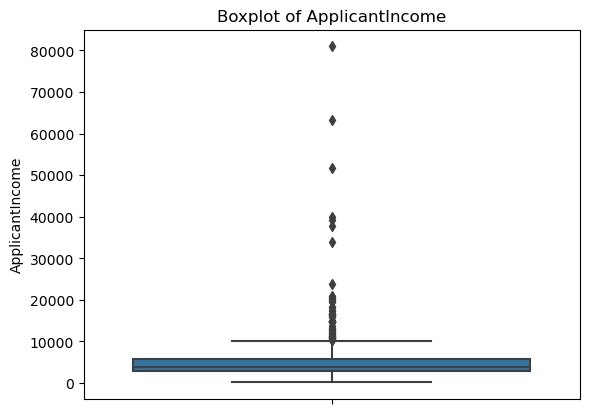

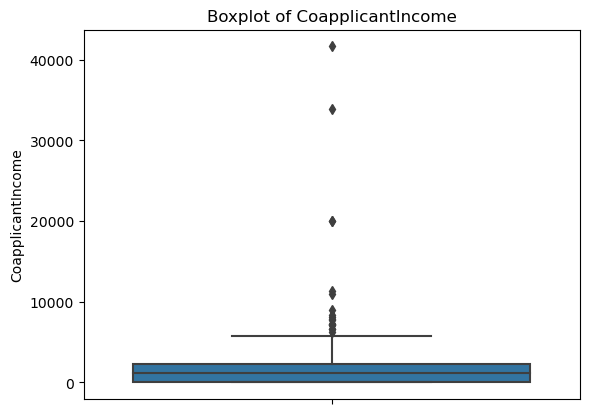

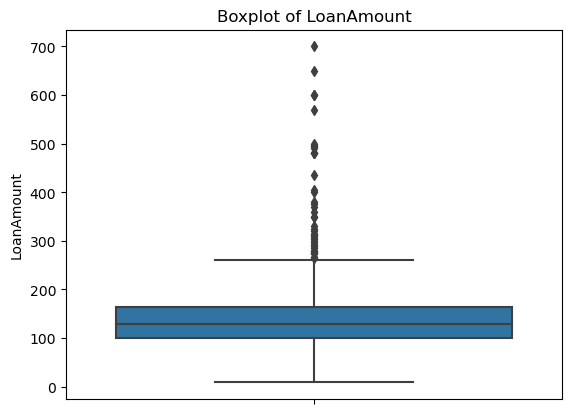

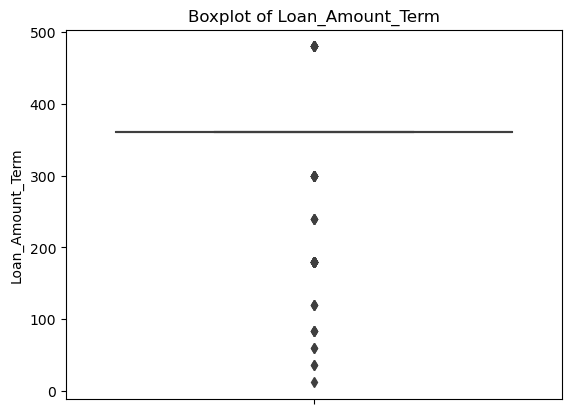

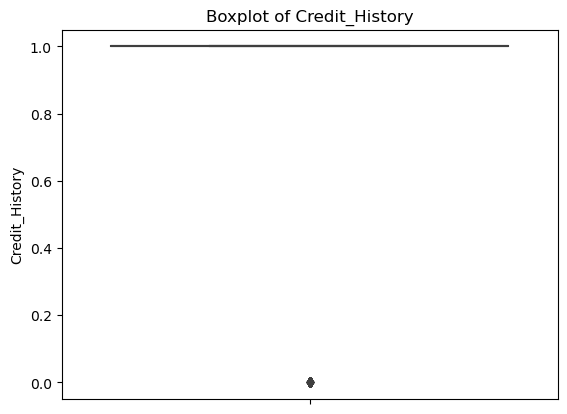

In [238]:
#Visualization of the outliers with boxplots
for col in numeric_cols:
    sns.boxplot(y=col, data=data_cleaned)
    plt.title("Boxplot of {}".format(col))
    plt.show()

Based on the statistical analysis and boxplots of the numeric columns, we observe the presence of numerous outliers. However, since this is real financial data, it is reasonable to retain these outliers as they represent valid cases. Additionally, the "CoapplicantIncome" column contains several zero values, which can be interpreted as indicating that these applicants did not have a coapplicant.

## Data visualization 

Loan_Status
Y    422
N    192
Name: count, dtype: int64


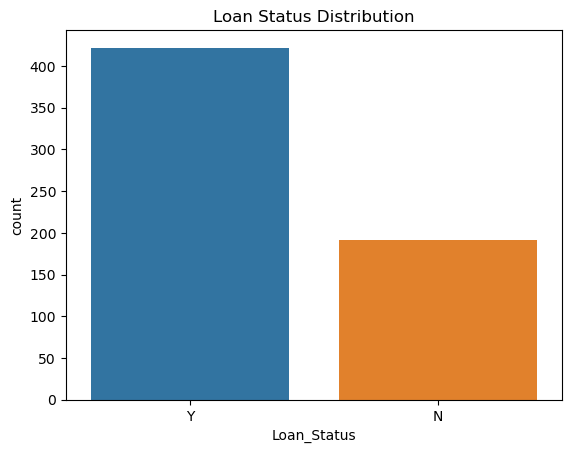

In [239]:
#Loan Status Distribution
print(data_cleaned["Loan_Status"].value_counts())
sns.countplot(x="Loan_Status", data=data_cleaned)
plt.title("Loan Status Distribution")
plt.show()

Loan_Status  Gender
N            Male      155
             Female     37
Y            Male      347
             Female     75
Name: count, dtype: int64


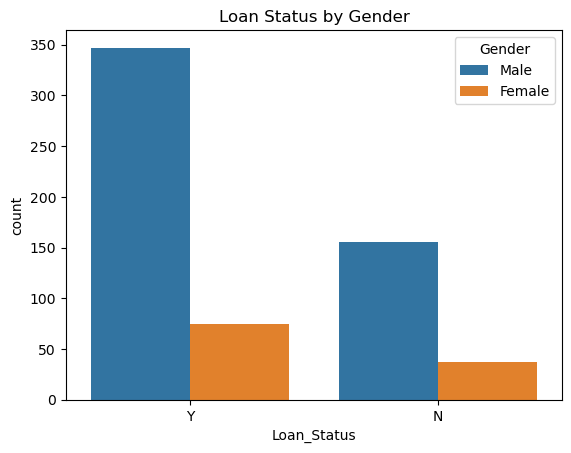

In [240]:
#Loan Status by Gender  
print(data_cleaned.groupby("Loan_Status")["Gender"].value_counts())
sns.countplot(x="Loan_Status", hue="Gender", data=data_cleaned)
plt.title("Loan Status by Gender")
plt.show()

Loan_Status  Married
N            Yes        113
             No          79
Y            Yes        288
             No         134
Name: count, dtype: int64


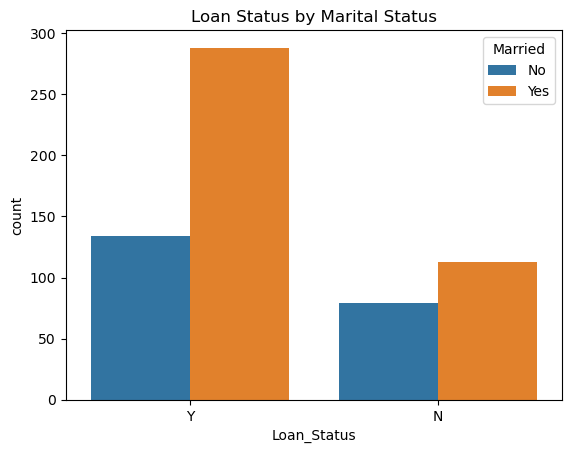

In [241]:
#Loan Status by Marital Status 
print(data_cleaned.groupby("Loan_Status")["Married"].value_counts())
sns.countplot(x="Loan_Status", hue="Married", data=data_cleaned)
plt.title("Loan Status by Marital Status")
plt.show()

Loan_Status  Credit_History
N            1.0               110
             0.0                82
Y            1.0               415
             0.0                 7
Name: count, dtype: int64


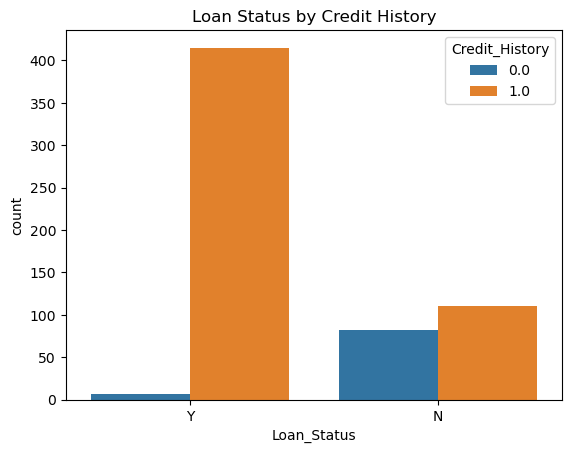

In [242]:
#Loan Status by Credit History 
print(data_cleaned.groupby("Loan_Status")["Credit_History"].value_counts())
sns.countplot(x="Loan_Status", hue="Credit_History", data=data_cleaned)
plt.title("Loan Status by Credit History")
plt.show()

Loan_Status  Property_Area
N            Rural             69
             Urban             69
             Semiurban         54
Y            Semiurban        179
             Urban            133
             Rural            110
Name: count, dtype: int64


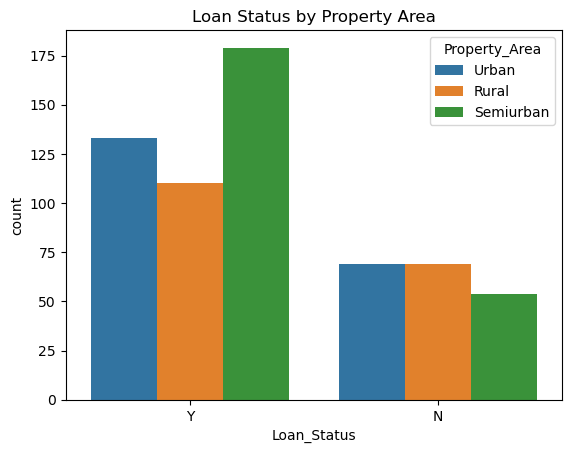

In [243]:
#Loan Status by Property Area 
print(data_cleaned.groupby("Loan_Status")["Property_Area"].value_counts())
sns.countplot(x="Loan_Status", hue="Property_Area", data=data_cleaned)
plt.title("Loan Status by Property Area")
plt.show()

Loan_Status  Dependents
N            0             113
             1              36
             2              25
             3+             18
Y            0             247
             2              76
             1              66
             3+             33
Name: count, dtype: int64


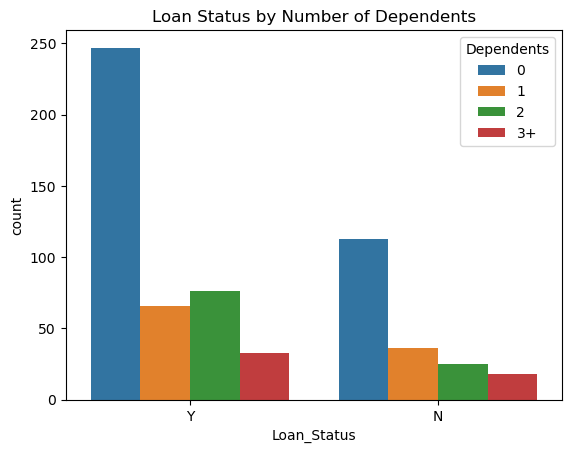

In [244]:
#Loan Status by Dependents 
print(data_cleaned.groupby("Loan_Status")["Dependents"].value_counts())
sns.countplot(x="Loan_Status", hue="Dependents", data=data_cleaned)
plt.title("Loan Status by Number of Dependents")
plt.show()

## Models building

In [245]:
#Some transformations
data_cleaned["LoanAmount_log"] = np.log(data_cleaned["LoanAmount"])
data_cleaned["TotalIncome"] = data_cleaned["ApplicantIncome"] + data_cleaned["CoapplicantIncome"]
data_cleaned["TotalIncome_log"] = np.log(data_cleaned["TotalIncome"])
data_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [246]:
#Gender, Married, Dependents, Education, Loan_Amount_Term, Credit_History, LoanAmount_log, TotalIncome
X = data_cleaned[["Gender", "Married", "Dependents", "Education", "Loan_Amount_Term", "Credit_History", "LoanAmount_log", "TotalIncome"]].values         
#Loan Status column
y = data_cleaned["Loan_Status"].values

In [247]:
X

array([['Male', 'No', '0', ..., 1.0, 4.852030263919617, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [248]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [249]:
#Spliting dataset for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [205]:
#Enconding the variables will be very helpful to convert categoricals variables into numeric types.
#Encoding the train categorical columns 
Labelencoder_x = LabelEncoder()
Labelencoder_y = LabelEncoder()

for i in range(0, 5):
    X_train[:,i] = Labelencoder_x.fit_transform(X_train[:,i])
X_train[:,7] = Labelencoder_x.fit_transform(X_train[:,7])
    
y_train = Labelencoder_y.fit_transform(y_train)

In [259]:
X_train   

array([['Male', 'Yes', '1', ..., 1.0, 4.709530201312334, 5039.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.969813299576001, 5821.0],
       ['Male', 'Yes', '1', ..., 1.0, 5.298317366548036, 6875.0],
       ...,
       ['Male', 'No', '2', ..., 1.0, 5.087596335232384, 10180.0],
       ['Female', 'No', '1', ..., 1.0, 4.718498871295094, 3541.0],
       ['Male', 'No', '0', ..., 1.0, 4.248495242049359, 2718.0]],
      dtype=object)

In [251]:
y_train

array(['Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y

In [252]:
#Encoding the test categorical columns 
for i in range(0,5):
    X_test[:,i] = Labelencoder_x.fit_transform(X_test[:,i])
X_test[:,7] = Labelencoder_x.fit_transform(X_test[:,7])

y_test = Labelencoder_y.fit_transform(y_test)

In [253]:
X_test

array([[1, 0, 2, 0, 5, 1.0, 4.672828834461906, 15],
       [0, 0, 0, 0, 5, 1.0, 4.007333185232471, 114],
       [1, 1, 0, 0, 5, 1.0, 5.541263545158426, 104],
       [1, 1, 2, 0, 5, 1.0, 4.897839799950911, 40],
       [1, 1, 1, 1, 2, 1.0, 4.919980925828125, 87],
       [0, 0, 0, 0, 5, 1.0, 5.049856007249537, 73],
       [1, 1, 0, 0, 2, 1.0, 3.7376696182833684, 18],
       [0, 0, 0, 0, 5, 1.0, 4.0943445622221, 4],
       [0, 1, 0, 0, 5, 1.0, 4.718498871295094, 37],
       [0, 0, 0, 1, 5, 1.0, 4.553876891600541, 9],
       [1, 1, 2, 1, 5, 1.0, 4.836281906951478, 58],
       [0, 0, 3, 0, 2, 1.0, 5.857933154483459, 119],
       [1, 1, 1, 0, 5, 1.0, 5.225746673713202, 55],
       [1, 1, 2, 1, 5, 0.0, 4.718498871295094, 61],
       [1, 1, 0, 0, 5, 1.0, 4.927253685157205, 70],
       [1, 1, 2, 1, 5, 1.0, 4.727387818712341, 0],
       [1, 0, 0, 0, 5, 1.0, 4.852030263919617, 90],
       [1, 1, 0, 0, 5, 1.0, 4.787491742782046, 44],
       [1, 1, 1, 1, 5, 0.0, 5.081404364984463, 89],
       [1, 1,

In [254]:
y_test

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [261]:
#Scaling the dataset
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
x_test = ss.fit_transform(X_test)

In [262]:
X_train

array([['Male', 'Yes', '1', ..., 1.0, 4.709530201312334, 5039.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.969813299576001, 5821.0],
       ['Male', 'Yes', '1', ..., 1.0, 5.298317366548036, 6875.0],
       ...,
       ['Male', 'No', '2', ..., 1.0, 5.087596335232384, 10180.0],
       ['Female', 'No', '1', ..., 1.0, 4.718498871295094, 3541.0],
       ['Male', 'No', '0', ..., 1.0, 4.248495242049359, 2718.0]],
      dtype=object)

In [263]:
x_test

array([[ 0.50507627, -1.36398868,  1.42732672, -0.56796183,  0.27062339,
         0.45374261, -0.30651063, -1.30050908],
       [-1.97989899, -1.36398868, -0.6878683 , -0.56796183,  0.27062339,
         0.45374261, -1.66515654,  1.58669221],
       [ 0.50507627,  0.73314391, -0.6878683 , -0.56796183,  0.27062339,
         0.45374261,  1.46644651,  1.29505572],
       [ 0.50507627,  0.73314391,  1.42732672, -0.56796183,  0.27062339,
         0.45374261,  0.15286161, -0.57141785],
       [ 0.50507627,  0.73314391,  0.36972921,  1.76068169, -2.85000257,
         0.45374261,  0.19806393,  0.79927368],
       [-1.97989899, -1.36398868, -0.6878683 , -0.56796183,  0.27062339,
         0.45374261,  0.46321104,  0.39098258],
       [ 0.50507627,  0.73314391, -0.6878683 , -0.56796183, -2.85000257,
         0.45374261, -2.21568952, -1.21301813],
       [-1.97989899, -1.36398868, -0.6878683 , -0.56796183,  0.27062339,
         0.45374261, -1.48751804, -1.62130922],
       [-1.97989899,  0.73314391

### Random Forest model

In [ ]:
#Model buiding
rf_model = RandomForestClassifier() 
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf 

In [215]:
#Model evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("-"*50)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("-"*50)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.36585365853658536
--------------------------------------------------
Confusion Matrix:
 [[28 15]
 [63 17]]
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.65      0.42        43
           1       0.53      0.21      0.30        80

    accuracy                           0.37       123
   macro avg       0.42      0.43      0.36       123
weighted avg       0.45      0.37      0.34       123



**Conclusion**: the accuracy of 59.35% is relatively low, indicating that the Random Forest model may not perform well enough for reliable decision-making in the context of loan approval prediction.

### Decision Tree Clasifier model

In [216]:
#Model building
dt_model = DecisionTreeClassifier(random_state=25)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [217]:
#Model evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("-"*50)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("-"*50)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6097560975609756
--------------------------------------------------
Confusion Matrix:
 [[13 30]
 [18 62]]
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.30      0.35        43
           1       0.67      0.78      0.72        80

    accuracy                           0.61       123
   macro avg       0.55      0.54      0.54       123
weighted avg       0.58      0.61      0.59       123



**Conclusion**: the Decision Tree model achieved an accuracy of 60.98%, reflecting a modest improvement over the Random Forest model. While this score indicates some ability to differentiate between approved and rejected loan applicants, it remains insufficient for reliable decision-making.

### Naive_Bayes model

In [218]:
#Model building
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
y_pred_nb

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [219]:
#Model evaluation
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("-"*50)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("-"*50)
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.3333333333333333
--------------------------------------------------
Confusion Matrix:
 [[39  4]
 [78  2]]
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.91      0.49        43
           1       0.33      0.03      0.05        80

    accuracy                           0.33       123
   macro avg       0.33      0.47      0.27       123
weighted avg       0.33      0.33      0.20       123



**Conclusion**: the Naive Bayes model achieved an accuracy of 33.33%, which is very low and suggests that the model performs poorly in distinguishing between approved and rejected loan applicants. This level of accuracy indicates that the model is not suitable at all for reliable decision-making in this context.

### XGBOOST model

In [221]:
#Model building
xgb_model = xgb.XGBClassifier(random_state=25)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [222]:
#Model evaluation
print("XGBoost Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy:  0.7642276422764228
Confusion Matrix:
 [[15 28]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.35      0.51        43
           1       0.74      0.99      0.84        80

    accuracy                           0.76       123
   macro avg       0.84      0.67      0.68       123
weighted avg       0.81      0.76      0.73       123



**Conclusion**: the XGBoost model achieved an accuracy of 76.42%, indicating a significant improvement compared to previous models. This suggests that XGBoost is more effective at predicting loan approvals, making it a more reliable choice for decision-making in this context.

## Conclusion

In conclusion, this project serves as a practical example of the application of machine learning techniques in the finance sector. After thorough data cleaning and exploration, various models were tested, with XGBoost achieving the highest accuracy of **76.42%**. While these results are promising, there is potential for further improvements to enhance the model's performance. Overall, the project underscores the significant role that data-driven insights play in informing financial decisions.